# Big Data Mart Sales Problem

In [1]:
#importing the required libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,classification_report

In [2]:
#getting the data
Train_Data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
Test_Data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')                       

In [3]:
Train_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
Test_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print(Train_Data.columns,'\n\n\n',Test_Data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object') 


 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [6]:
Test_Data.shape,Train_Data.shape

((5681, 11), (8523, 12))

In [7]:
print(Train_Data.isnull().sum(),'\n\n\n',Test_Data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 


 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


**we can see that there are sum null values**

Train data


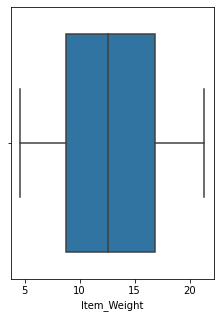

Test data


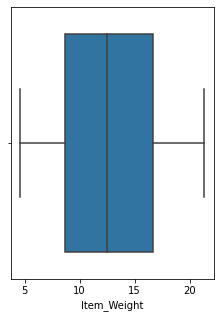

In [8]:
print('Train data')
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.boxplot('Item_Weight', data=Train_Data)
plt.show()
print('Test data')
plt.figure(figsize=(8,5))
plt.subplot(1,2,2)
sns.boxplot('Item_Weight', data=Test_Data)
plt.show()

There are no Outliesrs

In [9]:
print(Train_Data['Outlet_Size'].value_counts(),'\n\n',Test_Data['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

 Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [10]:
imp=SimpleImputer(strategy='mean')
Train_Data['Item_Weight']=imp.fit_transform(Train_Data['Item_Weight'].values.reshape(-1,1))
Test_Data['Item_Weight']=imp.fit_transform(Test_Data['Item_Weight'].values.reshape(-1,1))

In [11]:
imp=SimpleImputer(strategy='most_frequent')
Train_Data['Outlet_Size']=imp.fit_transform(Train_Data['Outlet_Size'].values.reshape(-1,1))
Test_Data['Outlet_Size']=imp.fit_transform(Test_Data['Outlet_Size'].values.reshape(-1,1))

In [12]:
print(Train_Data.isnull().sum(),'\n\n\n',Test_Data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64 


 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


# EDA

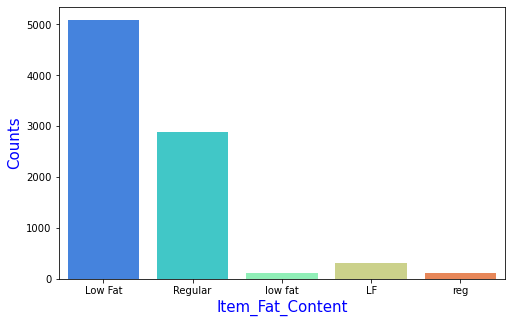

In [13]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content', data=Train_Data, palette='rainbow')
plt.xlabel('Item_Fat_Content',size=15,c='b')
plt.ylabel('Counts',size=15,c='b')
plt.show()

In [14]:
Train_Data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat', 'Low Fat', 'Regular'], inplace = True)
Test_Data['Item_Fat_Content'].replace(['low fat','LF','reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace = True)

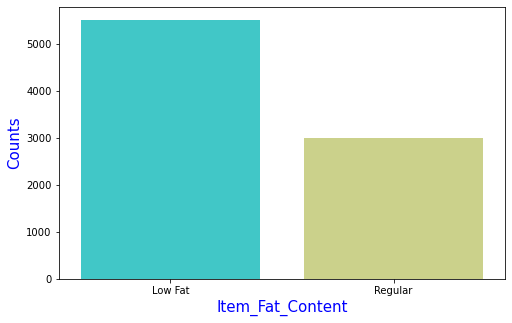

In [15]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content', data=Train_Data, palette='rainbow')
plt.xlabel('Item_Fat_Content',size=15,c='b')
plt.ylabel('Counts',size=15,c='b')
plt.show()

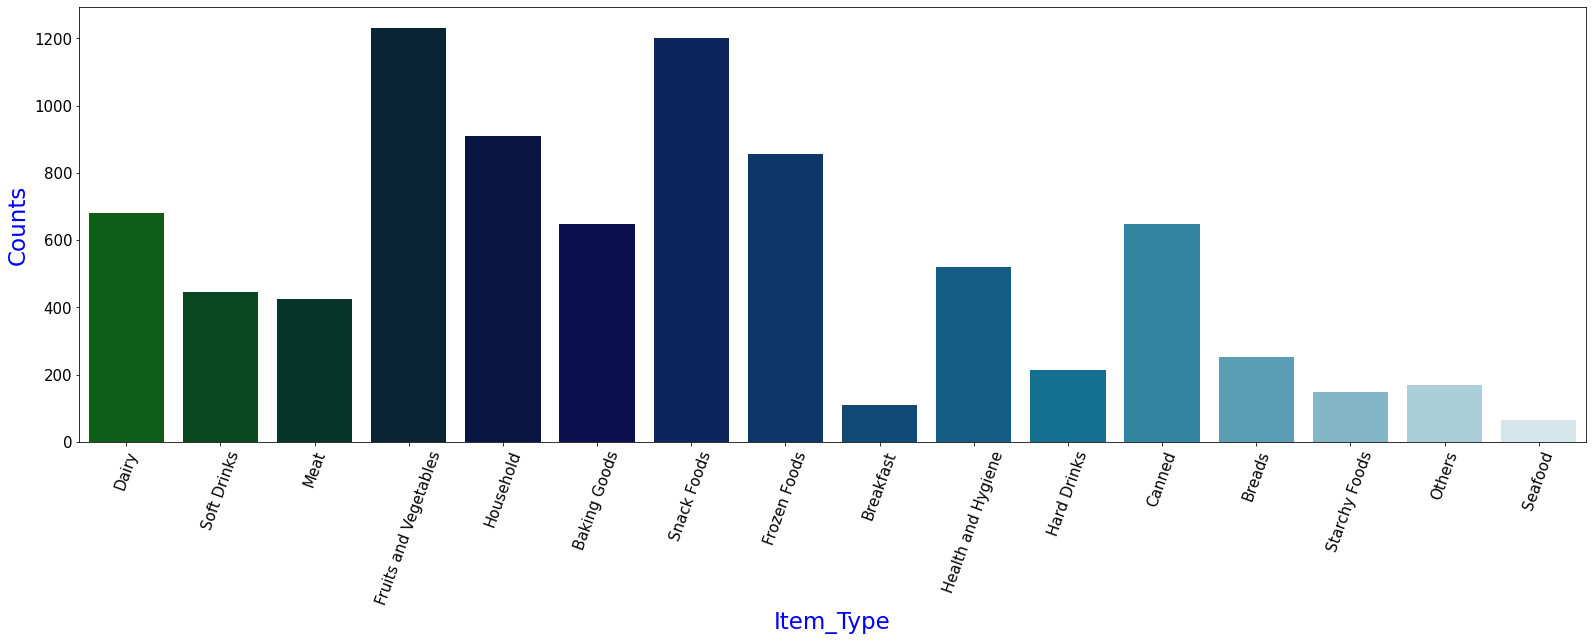

In [16]:
plt.figure(figsize=(27,8))
sns.countplot('Item_Type', data=Train_Data, palette='ocean')
plt.xticks(size=15,rotation=70)
plt.yticks(size=15)
plt.xlabel('Item_Type',size=23,c='b')
plt.ylabel('Counts',size=23,c='b')
plt.show()

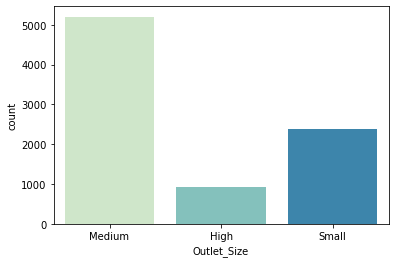

In [17]:
sns.countplot('Outlet_Size', data=Train_Data, palette='GnBu')
plt.show()

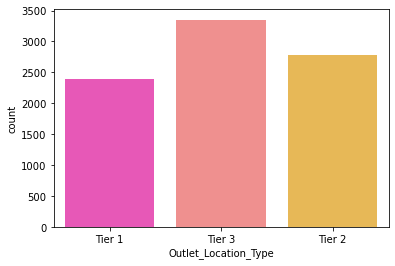

In [18]:
sns.countplot('Outlet_Location_Type', data=Train_Data, palette='spring')
plt.show()

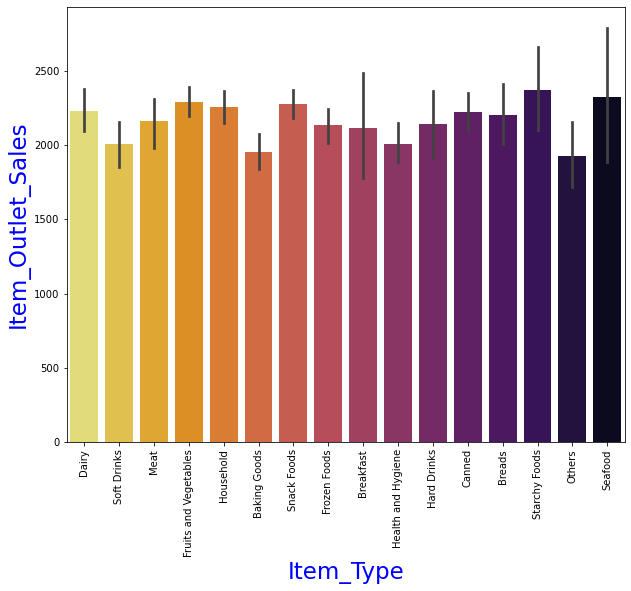

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=Train_Data, palette= 'inferno_r')
plt.xticks(rotation=90)
plt.xlabel('Item_Type',size=23,c='b')
plt.ylabel('Item_Outlet_Sales',size=23,c='b')
plt.show()

In [20]:
lc=LabelEncoder()
en=Train_Data.select_dtypes(include ='object').columns
en1=Test_Data.select_dtypes(include ='object').columns

In [21]:
for i in en:
    Train_Data[i]=lc.fit_transform(Train_Data[i])
for i in en:
    Test_Data[i]=lc.fit_transform(Test_Data[i])

In [22]:
Train_Data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228


In [23]:
Test_Data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.75,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.30,1,0.038428,4,87.3198,2,2007,1,1,1


In [24]:
x=Train_Data.drop(['Item_Outlet_Sales','Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Type'], axis=1)
y=Train_Data['Item_Outlet_Sales']

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=45)

In [26]:
r=Ridge()
l=Lasso()
dtr=DecisionTreeRegressor()
kn=KNeighborsRegressor()

In [27]:
r.fit(xtrain,ytrain)
pred=r.predict(xtest)
r2_score(pred,ytest)

0.034300768357117706

In [28]:
l.fit(xtrain,ytrain)
pred1=l.predict(xtest)
r2_score(pred1,ytest)

0.030238585631258474

In [29]:
dtr.fit(xtrain,ytrain)
pred2=dtr.predict(xtest)
r2_score(pred2 ,ytest)

0.2032275391565732

In [30]:
kn.fit(xtrain,ytrain)
pred3=kn.predict(xtest)
r2_score(pred3 ,ytest)

0.09724312047367034